In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


In [2]:
# Charger le dataset Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Créer un DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Afficher les 5 premières lignes
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convertir en DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

print(df_scaled.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


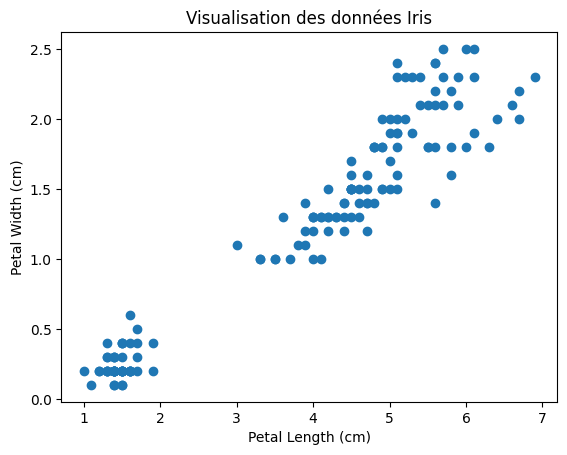

In [5]:
plt.figure()
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Visualisation des données Iris")
plt.show()


In [6]:
from sklearn.cluster import KMeans


In [7]:
# Choix du nombre de clusters
k = 3

# Appliquer K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Récupérer les labels
labels = kmeans.labels_

# Centres des clusters
centers = kmeans.cluster_centers_

print("Centres des clusters :")
print(centers)

print("\nLabels attribués aux points :")
print(labels)


Centres des clusters :
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Labels attribués aux points :
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


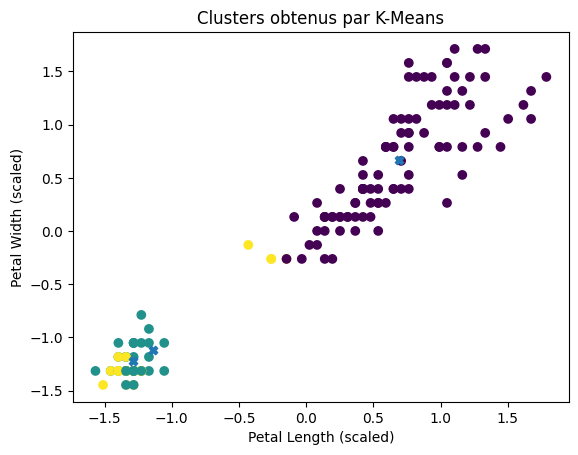

In [8]:
plt.figure()
plt.scatter(
    df_scaled["petal length (cm)"],
    df_scaled["petal width (cm)"],
    c=labels
)

plt.scatter(
    centers[:, 2],
    centers[:, 3],
    marker="X"
)

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Clusters obtenus par K-Means")
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print("Silhouette Score :", score)


Silhouette Score : 0.4798814508199817


In [10]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k} → Silhouette Score = {score:.3f}")


k = 2 → Silhouette Score = 0.582
k = 3 → Silhouette Score = 0.480
k = 4 → Silhouette Score = 0.385
k = 5 → Silhouette Score = 0.345
k = 6 → Silhouette Score = 0.334


In [11]:
# Sans normalisation
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(df)

score_raw = silhouette_score(df, labels_raw)

# Avec normalisation
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

score_scaled = silhouette_score(X_scaled, labels_scaled)

print("Silhouette sans normalisation :", score_raw)
print("Silhouette avec normalisation :", score_scaled)


Silhouette sans normalisation : 0.551191604619592
Silhouette avec normalisation : 0.4798814508199817
